In [1]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Introdução

Neste checkpoint vamos fazer um modelo de classificação baseado em árvores de decisão para prever se um filme vai ganhar um Oscar ou não. Veremos como representar graficamente as árvores de decisão obtidas e como a acurácia varia após limitarmos sua profundidade.


## Dataset

Nesta aula, usaremos um conjunto de dados com informações do filme ("Movie_classification.csv").
Este conjunto de dados é composto pelas seguintes features:
 

 *   **Marketing expense:**    (float64)    Gasto total com Marketing      
 *   **Production expense:**   (float64)    Gasto total de Produção
 *   **Multiplex coverage:**   (float64)    Cobertura Média Multiplex
 *   **Budget:**               (float64)    Orçamento
 *   **Movie_length:**         (float64)    Duração do filme
 *   **Lead_ Actor_Rating:**   (float64)    Pontuação do ator principal
 *   **Lead_Actress_rating:**  (float64)    Pontuação da atriz principal
 *   **Director_rating:**      (float64)    Pontuação do diretor
 *   **Producer_rating:**      (float64)    Pontuação do produtor
 *   **Critic_rating:**        (float64)    Pontuação dada pelos críticos
 *   **Trailer_views:**        (int64)      Número de visualizações do trailer
 *   **3D_available:**         (object)     Se estiver disponível em 3D (Sim/Não)
 *   **Time_taken:**           (float64)    Duração do filme
 *   **Twitter_hastags:**      (float64)    Número de menções no twitter
 *   **Genre:**                (object)     Gênero de filme
 *   **Avg_age_actors:**       (int64)      Idade média dos atores
 *   **Num_multiplex:**        (int64)      Número de multiplexes
 *   **Collection:**           (int64)      Coleção
 *   **Start_Tech_Oscar:**     (int64)      Se o filme recebeu um Oscar ou não.

## Imports

In [2]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

## Exercício 1 - Importar dados

1) Vamos ler os dados de "Movie_classification.csv" e salvá-los em um dataframe pandas.
2) Vamos ver quantos registros existem no DataFrame e quais são dtypes de cada coluna.
3) Vejamos os primeiros registros do DataFrame para verificar se os dados foram importados corretamente.

In [3]:
df = pd.read_csv("../Data/Movie_classification.csv", header=0)

In [4]:
df.shape

(506, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


## Exercício 2 - Imputação de valores ausentes

Verifique se há valores ausentes e se sim, impute-os.

In [7]:
#  vemos a quantidade de valores que cada coluna tem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
# observamos que time_taken é a única coluna que não possui 506 observações,
# portanto, imputaremos os valores ausentes usando a média.
df['Time_taken'].mean()

157.3914979757085

In [9]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Exercício 3 - Geração de Variáveis Dummies.

Vamos ver se existem variáveis categóricas e, em caso afirmativo, gerar dummies para essas colunas.

In [11]:
df.dtypes.loc[df.dtypes=="object"]  

3D_available    object
Genre           object
dtype: object

In [12]:
df[['3D_available','Genre']].head()

,3D_available,Genre
0,YES,Thriller
1,NO,Drama
2,NO,Comedy
3,YES,Drama
4,NO,Drama


In [13]:
df.Genre.unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [14]:
df["3D_available"].unique()

array(['YES', 'NO'], dtype=object)

In [15]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [16]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Exercício 4 - Features e variável target

Vamos construir uma matriz de features (X) e o vetor referente à variável target (Y) para prever o `Start_Tech_Oscar` no conjunto de dados completo.

Quais valores a variável `Start_Tech_Oscar` assume no conjunto de dados?

In [17]:
df.columns!="Start_Tech_Oscar"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [18]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [19]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [20]:
X.shape

(506, 20)

In [21]:
y = df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [22]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [23]:
y.value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

In [24]:
y.shape

(506,)

## Exercício 5 - Train Test Split

Vamos construir os conjuntos de treinamento e teste, atribuindo 70% dos registros para treinamento e 30% para teste.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [27]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,53,460,57400,1,1,0,0
116,22.6316,75.02,0.453,34307.680,146.0,8.535,8.645,8.500,8.860,8.44,432696,130.48,263.392,23,528,42400,0,1,0,0
45,23.4284,68.82,0.552,31563.510,107.3,7.385,7.525,7.395,7.490,8.42,470466,161.72,223.088,21,445,38600,0,0,0,1
16,41.0786,71.28,0.462,32968.925,102.8,7.670,7.805,7.740,7.785,7.80,532331,109.24,203.696,46,547,46200,0,1,0,0
468,331.5140,91.20,0.420,32918.930,144.5,8.520,8.550,8.440,8.670,6.96,383739,117.64,303.056,28,494,38200,0,1,0,0


In [28]:
X_train.shape

(354, 20)

In [29]:
X_test.shape

(152, 20)

## Exercício 6 - Treinando a árvore de decisão
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

Vamos treinar a árvore de decisão para o nosso problema de classificação e fazer as previsões para os conjuntos de dados de treinamento e teste.


In [30]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(random_state=40)

In [31]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [32]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [33]:
y_test_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

## Exercício 7 - Verificamos o desempenho do modelo
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  

Vamos importar as bibliotecas `accuracy_score` e `confusion_matrix` para analisar o desempenho do nosso modelo para os conjuntos de dados de treinamento e teste.


Recordamos que a matriz de confusão tem a seguinte forma:
<img style="float: center;" src="img/confusion_matrix.png">

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[165,   0],
       [  0, 189]])

In [36]:
confusion_matrix(y_test, y_test_pred)

array([[36, 29],
       [37, 50]])

In [37]:
accuracy_score(y_test, y_test_pred)

0.5657894736842105

As árvores de decisão implementadas no scikit-learn oferecem um atributo chamado `feature_importances_`. É a contribuição para a redução de impurezas em toda a árvore.

In [38]:
pd.DataFrame({'atributo':X.columns, 'importance':clftree.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
15,Collection,0.121426
7,Director_rating,0.107550
0,Marketing expense,0.096130
3,Budget,0.090591
4,Movie_length,0.074211
14,Num_multiplex,0.071997
11,Time_taken,0.068205
10,Trailer_views,0.068138
12,Twitter_hastags,0.060922
9,Critic_rating,0.043197


## Exercício 8 - Fazemos o gráfico do modelo ML

Você precisa ter as seguintes bibliotecas instaladas: `graphviz` e `pydotplus`

```
> conda install graphviz
> pip install pydotplus
```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html  
https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/



Se você for usuário Linux talvez precise instalar o seguinte comando: 

```
> sudo apt-get install graphviz
```

In [39]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [40]:
from IPython.display import Image

In [41]:
import pydotplus

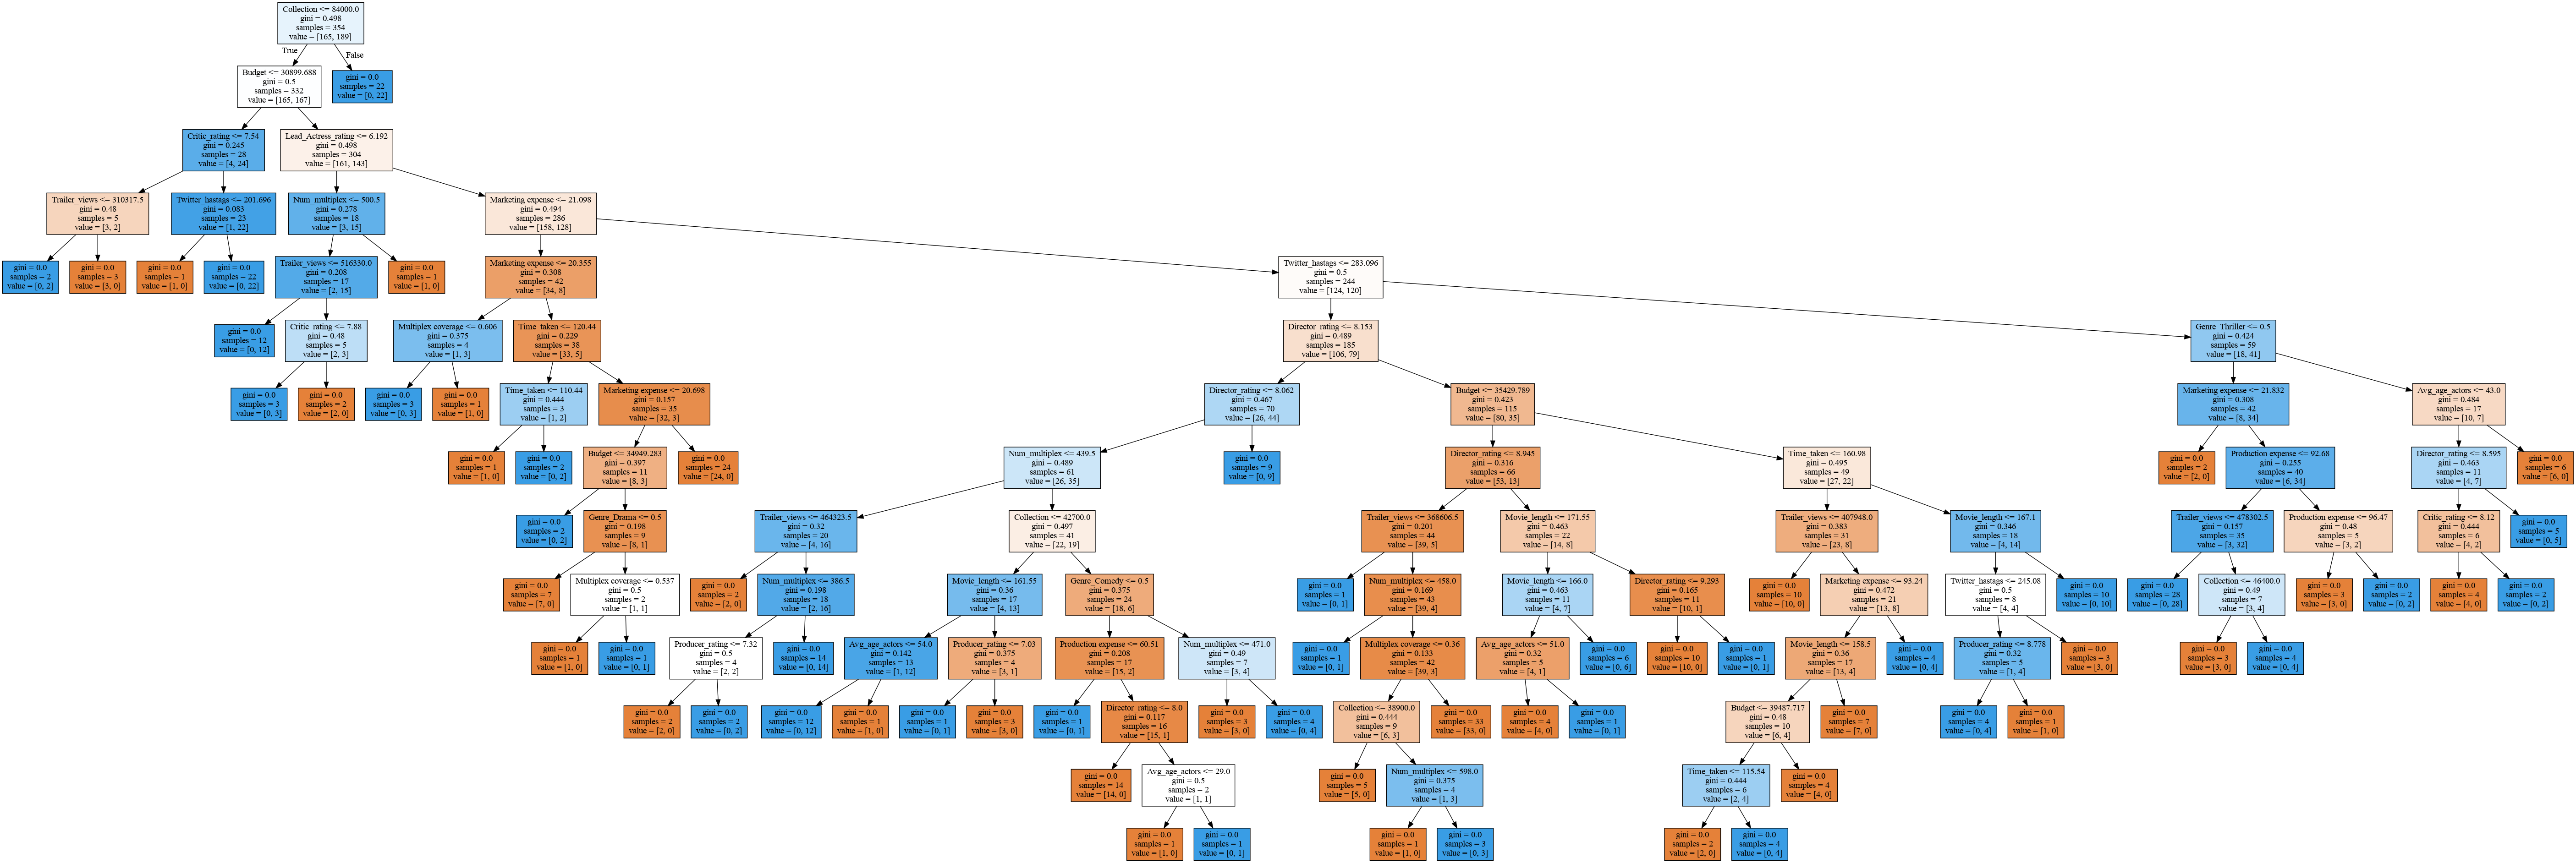

In [42]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Exercício 9 - Analisamos como varia o desempenho ao reduzirmos a profundidade da árvore (tree prunning).

Realizamos a poda da árvore definindo os seguintes hiperparâmetros:
 - min_samples_leaf = 20
 - max_depth = 4  
 
Em seguida, plotamos a árvore treinada e verificamos o desempenho no conjunto de dados de teste. 

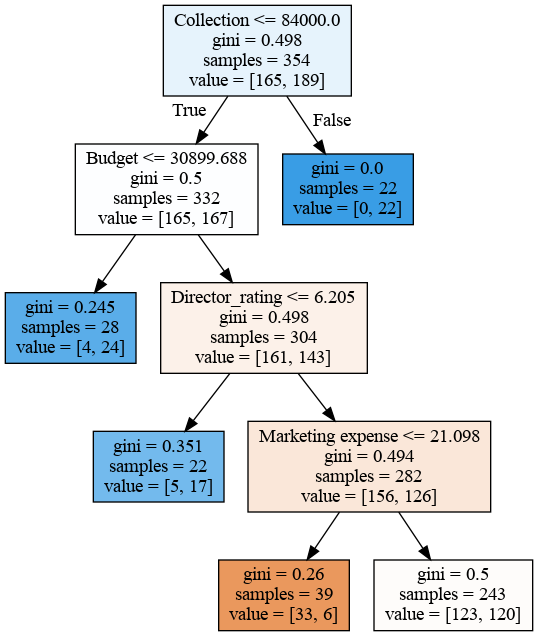

In [43]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4, random_state=40)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [44]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5789473684210527

In [45]:
confusion_matrix(y_test, clftree2.predict(X_test))

array([[58,  7],
       [57, 30]])

In [46]:
pd.DataFrame({'atributo':X.columns, 'importance':clftree2.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
15,Collection,0.340126
0,Marketing expense,0.259252
3,Budget,0.255942
7,Director_rating,0.144680
11,Time_taken,0.000000
18,Genre_Drama,0.000000
17,Genre_Comedy,0.000000
16,3D_available_YES,0.000000
14,Num_multiplex,0.000000
13,Avg_age_actors,0.000000


## Exercício 10 - Otimizamos nossa árvore de decisão ajustando os hiperparâmetros usando gridsearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

Otimizamos o modelo, aplicando gridsearch com os seguintes hiperparâmetros:

```python 
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,None],
                "min_samples_split": [2, 3, 4,None]}
``` 



In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clftree = tree.DecisionTreeClassifier(random_state=40)

In [49]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [50]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy')

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [52]:
# Score durante o treinamento do modelo
grid_search.best_score_

0.6414084507042255

In [53]:
cv_clf = grid_search.best_estimator_

In [54]:
cv_clf

DecisionTreeClassifier(max_depth=9, min_samples_leaf=15, random_state=40)

In [55]:
accuracy_score(y_test, cv_clf.predict(X_test))

0.5789473684210527

In [56]:
confusion_matrix(y_test, cv_clf.predict(X_test))

array([[36, 29],
       [35, 52]])

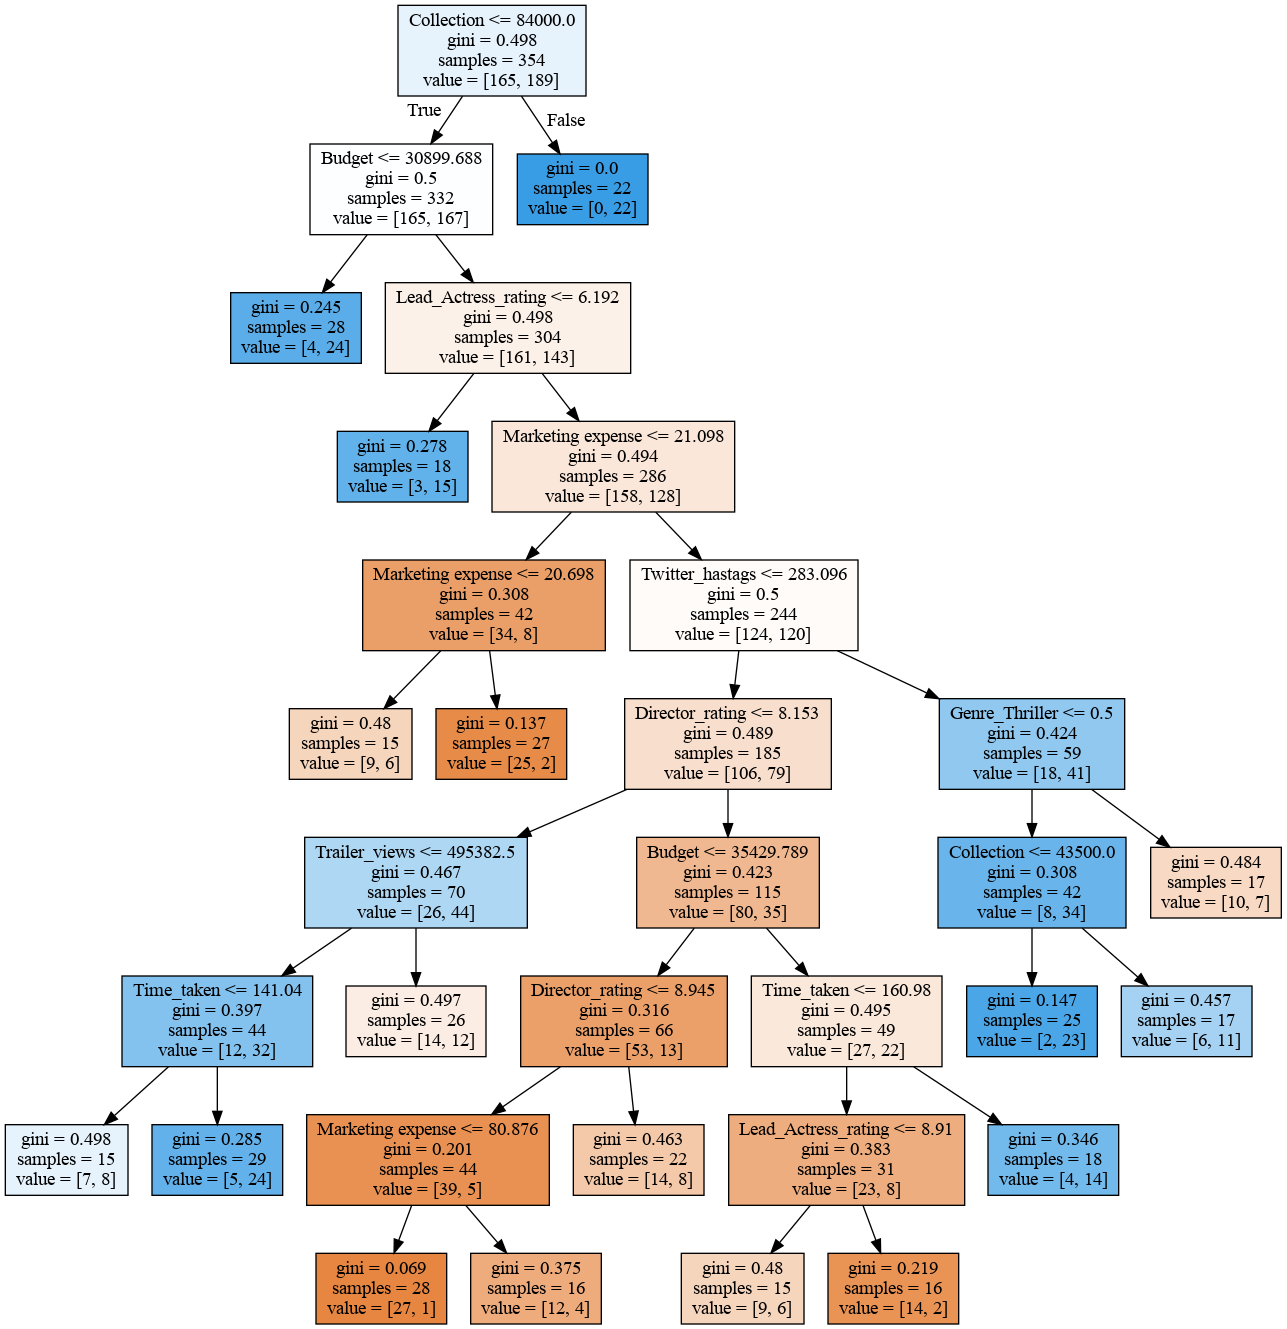

In [57]:
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [58]:
pd.DataFrame({'atributo':X.columns, 'importance':cv_clf.feature_importances_}).sort_values('importance', ascending = False)

,atributo,importance
15,Collection,0.167032
3,Budget,0.160487
7,Director_rating,0.156775
0,Marketing expense,0.135490
11,Time_taken,0.112263
12,Twitter_hastags,0.091660
6,Lead_Actress_rating,0.088676
19,Genre_Thriller,0.054667
10,Trailer_views,0.032950
8,Producer_rating,0.000000


In [59]:
X_train.to_csv("../Data/Movie_classification_train_X.csv", sep="\t", header=True, index = False)

X_test.to_csv("../Data/Movie_classification_test_X.csv", sep="\t", header=True, index = False)

y_train.to_csv("../Data/Movie_classification_train_y.csv", sep="\t", header=True, index = False)

y_test .to_csv("../Data/Movie_classification_test_y.csv", sep="\t", header=True, index = False)